<a href="https://colab.research.google.com/github/Isaac-Guz/PDI_IB_EneJun2025/blob/main/Act_2_Analisis_de_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 2.- Análisis de una imagen Alumno: Isaac Jair Guzmán Berumen Matrícula: 1917725 Clase: N1 Grupo:002


=== Paso 1: Cargar imagen ===
Image dimensions: 626x418, Channels: 3


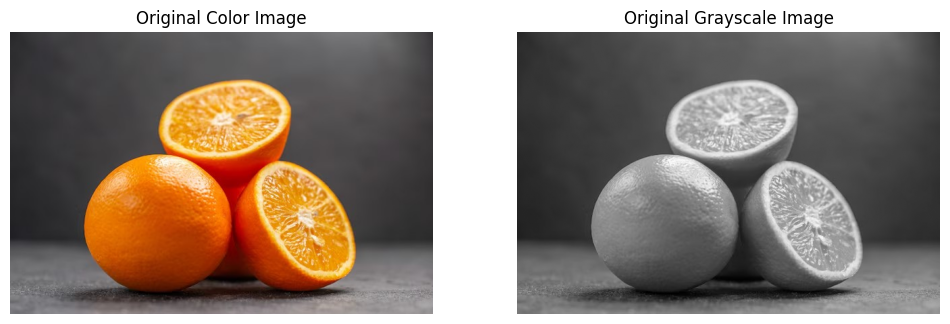


=== Paso 2: Preprocesamiento ===


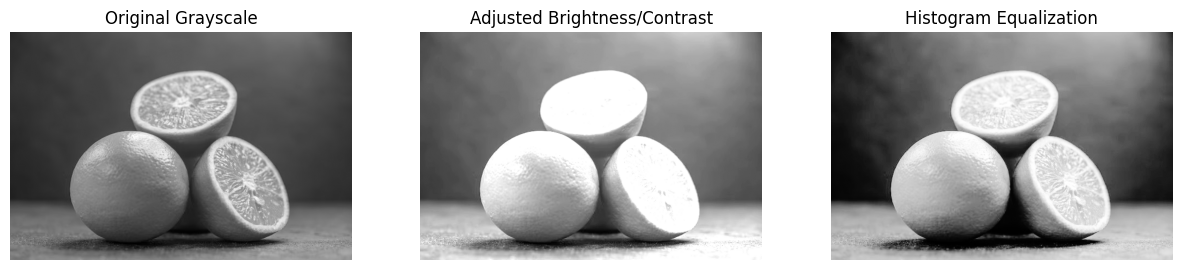

Best preprocessing method of the image:
- Histogram equalization is better for general contrast improvement

=== Paso 3: Segmentacion ===


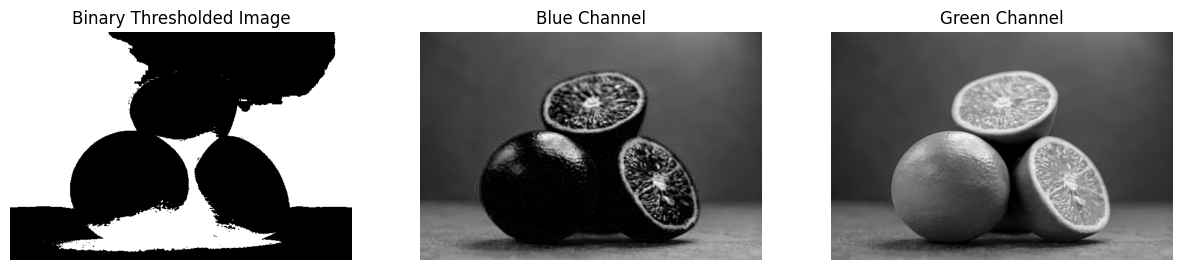


=== Paso 4: Analisis de caracteristicas ===
Area of segmented object: 121574 pixels
Bounding box: x=0, y=0, width=626, height=403


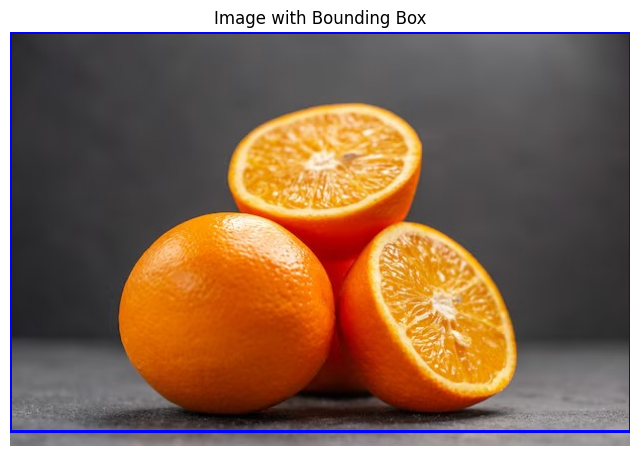

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_image(image_path):
    # Section 1: Load Image
    print("\n=== Paso 1: Cargar imagen ===")
    img_color = cv2.imread(image_path)
    if img_color is None:
        print("Error: Could not load image")
        return

    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Get image dimensions
    height, width, channels = img_color.shape
    print(f"Image dimensions: {width}x{height}, Channels: {channels}")

    # Display original images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title('Original Color Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')
    plt.show()

    # Section 2: Preprocessing
    print("\n=== Paso 2: Preprocesamiento ===")
    # Convert to grayscale (alternative method, though we already loaded grayscale)
    img_gray_converted = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Adjust brightness and contrast - Method 1: Arithmetic operations
    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 30    # Brightness control (0-100)
    img_adjusted = cv2.convertScaleAbs(img_gray_converted, alpha=alpha, beta=beta)

    # Method 2: Histogram equalization
    img_eq = cv2.equalizeHist(img_gray_converted)

    # Display preprocessing results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img_gray_converted, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_adjusted, cmap='gray')
    plt.title('Adjusted Brightness/Contrast')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_eq, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')
    plt.show()

    print("Best preprocessing method of the image:")
    print("- Histogram equalization is better for general contrast improvement")

    # For this analysis, we'll proceed with the adjusted image
    img_preprocessed = img_adjusted

    # Section 3: Segmentation
    print("\n=== Paso 3: Segmentacion ===")
    # Thresholding
    _, img_bin = cv2.threshold(img_preprocessed, 150, 255, cv2.THRESH_BINARY_INV)

    # Separate color channels
    b, g, r = cv2.split(img_color)

    # Display segmentation results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img_bin, cmap='gray')
    plt.title('Binary Thresholded Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(b, cmap='gray')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(g, cmap='gray')
    plt.title('Green Channel')
    plt.axis('off')
    plt.show()

    # Section 4: Feature Analysis
    print("\n=== Paso 4: Analisis de caracteristicas ===")
    # Calculate area of segmented object
    area = np.count_nonzero(img_bin)
    print(f"Area of segmented object: {area} pixels")

    # Get bounding box
    x, y, w, h = cv2.boundingRect(img_bin)
    print(f"Bounding box: x={x}, y={y}, width={w}, height={h}")

    # Draw bounding box on color image
    img_with_bbox = img_color.copy()
    cv2.rectangle(img_with_bbox, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display final result
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
    plt.title('Image with Bounding Box')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/naranja.jpg'  # Image in use
analyze_image(image_path)